# Plotting Concepts

### Data
A non-graphical representation of what we want to show. A collection of tidy dataframes.

### Geometries

* Point
* Line / Smoothed Line
* Polygon
* Bar
* Area
* Box Plot
* Violin Plot
* Distribution
* Tiles
* Maps (we'll use geopandas for this?)
* Annotations

### Layers
Show multiple stuff on the same plot.

### Facets
Show a collection of plots

### Themes
Size, colors, fonts, legend, background, axes, title, etc.

In [1]:
from plotnine import *
from plotnine.data import *

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Every plot needs 
* A data object (a dataframe)
* An aesthetic object (p9.aes)

Plus a *geometry* so that there's actually something to see.

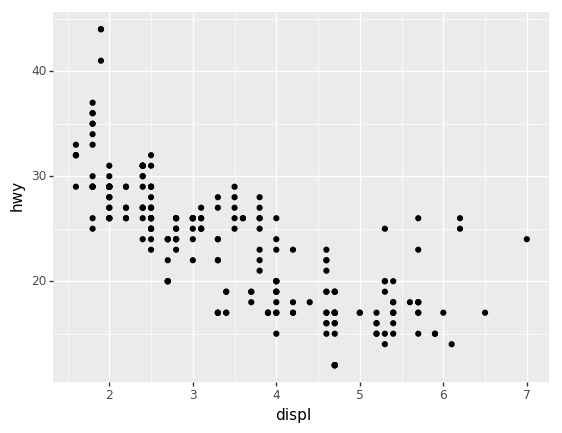

<ggplot: (-9223363262994916555)>

In [8]:
ggplot(mpg, aes(x='displ', y='hwy')) + geom_point()

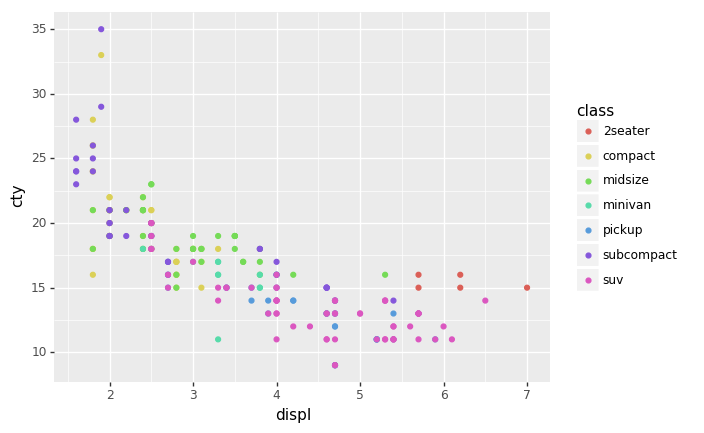

<ggplot: (-9223363263004616332)>

In [151]:
ggplot(mpg, aes(x='displ', y='cty')) + geom_point(aes(color='class'))

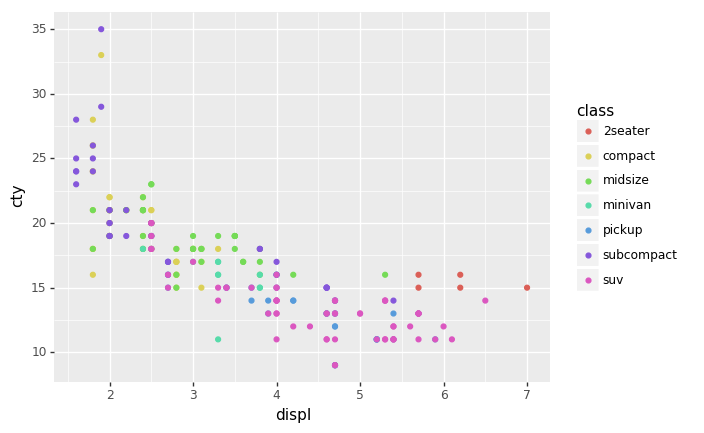

<ggplot: (-9223363262964931324)>

In [17]:
ggplot(mpg, aes(x='displ', y='cty', color='class')) + geom_point()

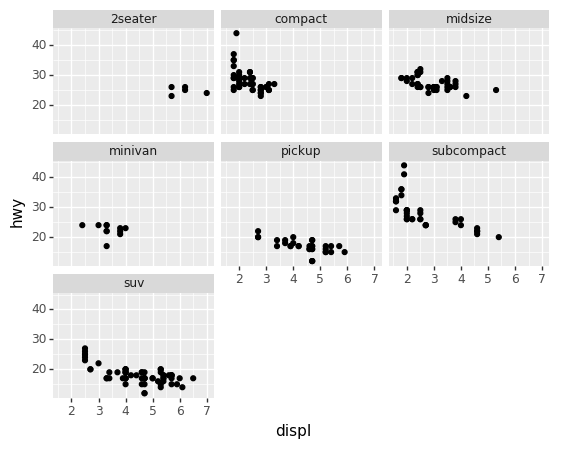

<ggplot: (8773889932408)>

In [18]:
ggplot(mpg, aes(x='displ', y='hwy')) + geom_point() + facet_wrap('~class')

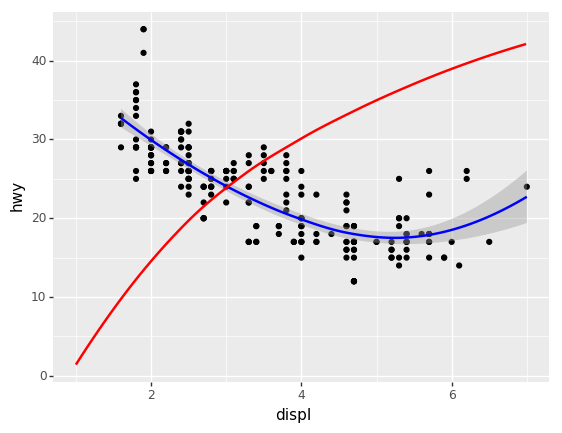

<ggplot: (8773854997326)>

In [121]:
df = pd.DataFrame({'x': np.arange(1, 7, 0.01)})
(ggplot(mpg, aes('displ', 'hwy')) + geom_point() + geom_smooth(method='loess', span=1.0, color='blue')
     + geom_smooth(aes('x', '10 * np.log10(x**5)'), data=df, color='red'))


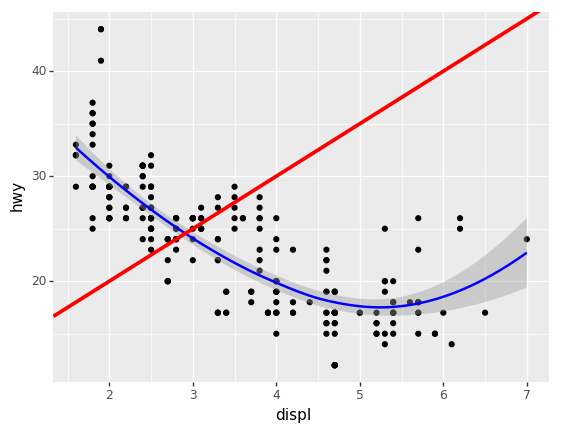

<ggplot: (8773817594358)>

In [116]:
# Better
(ggplot(mpg, aes('displ', 'hwy')) + geom_point() + geom_smooth(method='loess', span=1.0, color='blue')
     + geom_abline(intercept=10, slope=5, color='red', size=1.5))

In [87]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'x': np.arange(-2,2,0.01)})
df['y'] = df['x'] ** 2

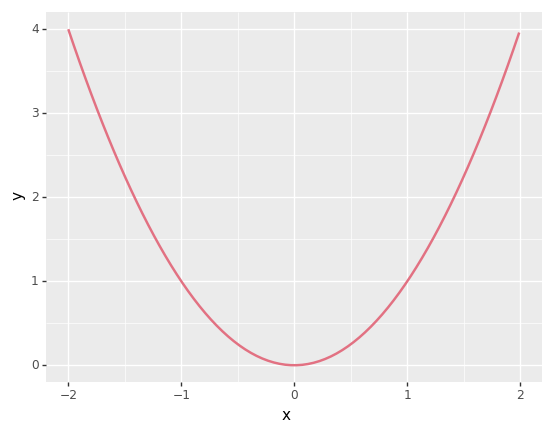

<ggplot: (8773817474361)>

In [99]:
ggplot(df, aes('x', 'y')) + geom_smooth(color='#e27182')

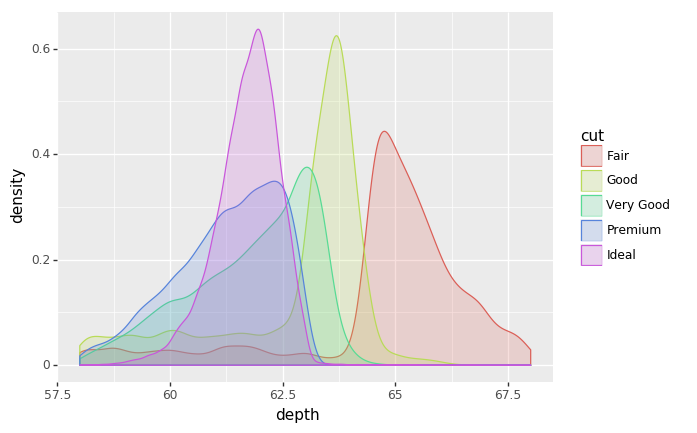

<ggplot: (-9223363262999908650)>

In [155]:
(ggplot(diamonds, aes('depth', fill='cut', colour='cut')) + 
     geom_density(alpha=0.2, na_rm=True) +
     xlim(58, 68))

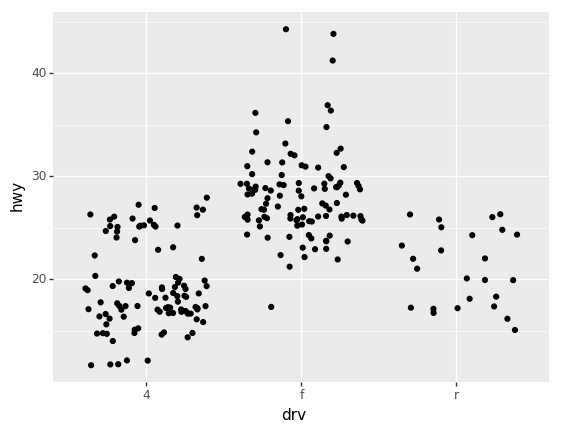

<ggplot: (8773850181447)>

In [27]:
ggplot(mpg, aes('drv', 'hwy')) + geom_jitter()

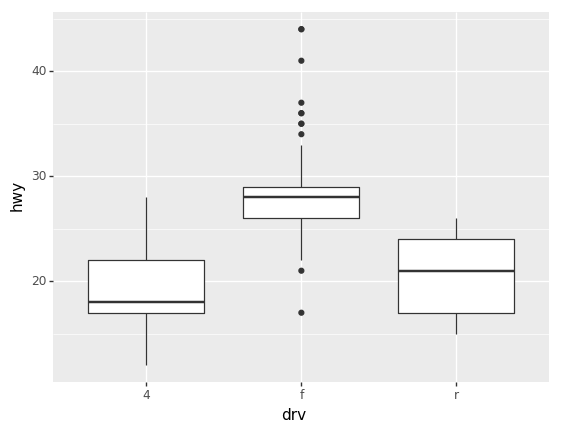

<ggplot: (-9223363263004619190)>

In [29]:
ggplot(mpg, aes('drv', 'hwy')) + geom_boxplot()

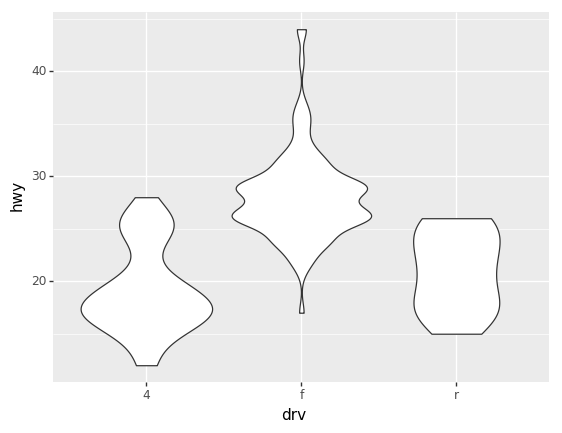

<ggplot: (-9223363262999859498)>

In [30]:
ggplot(mpg, aes('drv', 'hwy')) + geom_violin()

In [145]:
economics.tail()

,date,pce,pop,psavert,uempmed,unemploy
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


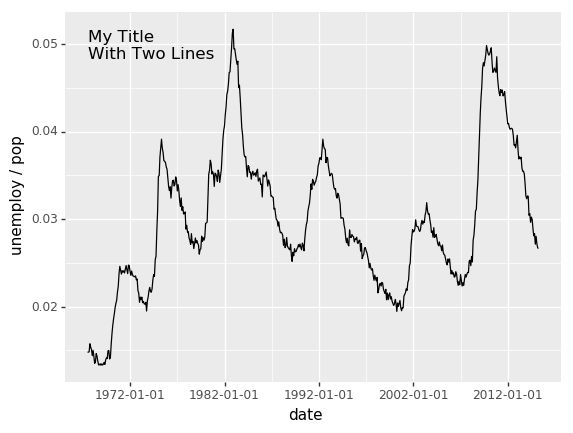

<ggplot: (-9223363263037147725)>

In [143]:
(ggplot(economics, aes('date', 'unemploy / pop')) + 
     geom_line() + 
     annotate('text', 
              x=economics.date.min(), 
              y=(economics['unemploy'] / economics['pop']).max(), 
              label='My Title\nWith Two Lines',
              size=12,
              ha='left',
              va='top'
             ))

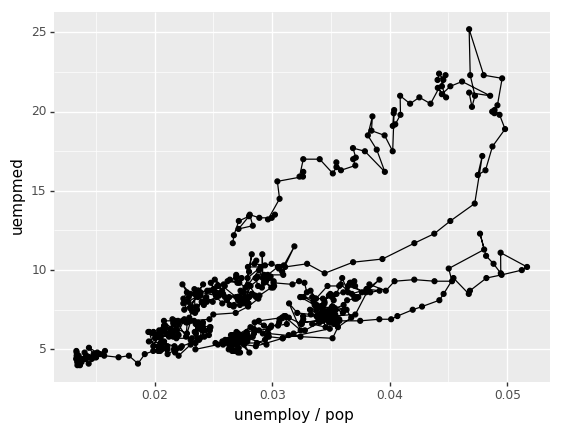

<ggplot: (8773889757686)>

In [33]:
ggplot(economics, aes('unemploy / pop', 'uempmed')) + geom_path() + geom_point()

In [78]:
faithfuld.head()

,eruptions,waiting,density
0,1.600000,43.0,0.003216
1,1.647297,43.0,0.003835
2,1.694595,43.0,0.004436
3,1.741892,43.0,0.004978
4,1.789189,43.0,0.005424


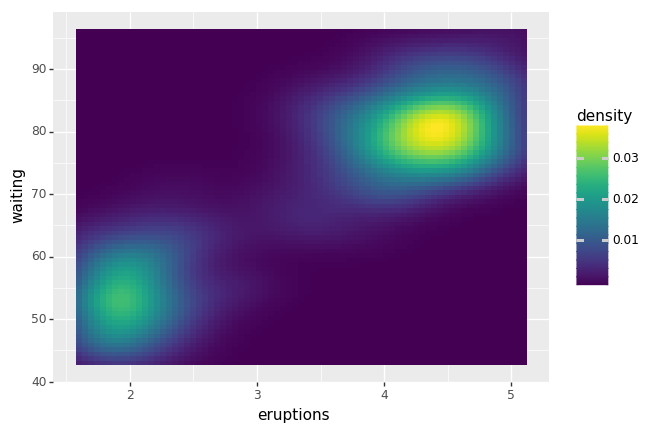

<ggplot: (8773817626786)>

In [111]:
ggplot(faithfuld, aes('eruptions', 'waiting')) + geom_tile(aes(fill='density')) 

In [57]:
#TODO: Move to another sheet
from geopandas import GeoDataFrame
counties = GeoDataFrame.from_file('/home/jbandlow/data/gis/michigan/Counties_v17a.shp')

In [62]:
counties.head()

,OBJECTID,FIPSCODE,FIPSNUM,NAME,LABEL,TYPE,CNTY_CODE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,ShapeSTAre,ShapeSTLen,geometry
0,1,001,1,Alcona,Alcona County,County,001,1798.557,694.424,444428.381,17A,landscape,lower,1.798557e+09,172519.815858,POLYGON ((-83.88711741260526 44.55385437651355...
1,2,003,3,Alger,Alger County,County,003,2424.879,936.247,599194.252,17A,landscape,upper,2.424879e+09,390876.657005,(POLYGON ((-87.11602141392686 46.2772599480474...
2,3,005,5,Allegan,Allegan County,County,005,2180.969,842.073,538923.422,17A,landscape,lower,2.180969e+09,192581.554358,POLYGON ((-85.54342616559491 42.42905407565728...
3,4,007,7,Alpena,Alpena County,County,007,1539.373,594.352,380383.246,17A,landscape,lower,1.539373e+09,288786.045591,(POLYGON ((-83.34340013970875 44.8855434230837...
4,5,009,9,Antrim,Antrim County,County,009,1358.721,524.603,335743.663,17A,landscape,lower,1.358721e+09,180700.646283,(POLYGON ((-84.84877327768537 44.9322168032886...


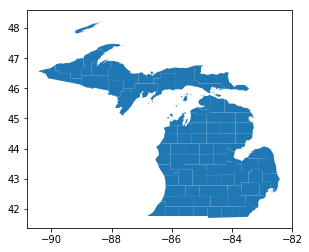

In [72]:
%matplotlib inline
counties.plot()

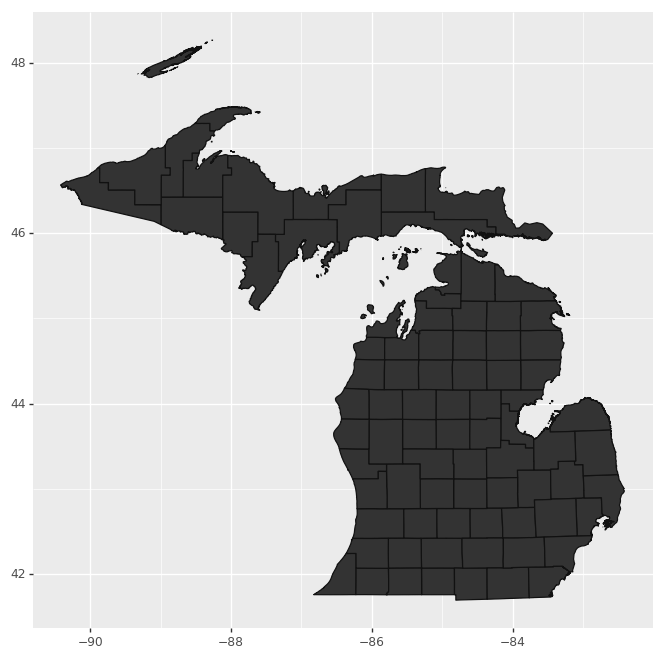

<ggplot: (8773889762010)>

In [149]:
ggplot() + geom_map(counties) + theme(figure_size=(8, 8))

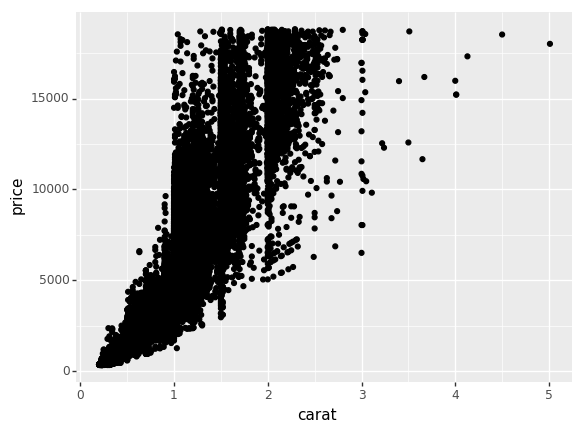

<ggplot: (8773889966165)>

In [11]:
ggplot(diamonds, aes('carat', 'price')) + geom_point()